In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from impvol_area_gif import make_impvol_gif

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")



In [23]:

xls_file = pd.ExcelFile('/Volatility_Data.xlsx')


spx = pd.read_excel(xls_file,'SPX')
vix = pd.read_excel(xls_file,'VIX')
sx5e = pd.read_excel(xls_file,'SX5E')
vstoxx = pd.read_excel(xls_file,'VSTOXX')

index_n_vol = {'SPX': spx, 'VIX': vix, 'SX5E' : sx5e, 'VSTOXX': vstoxx}

impvol_cols = ['Date','3MTH_IMPVOL_100.0%MNY_DF', '3MTH_IMPVOL_105.0%MNY_DF',
       '3MTH_IMPVOL_110.0%MNY_DF', '3MTH_IMPVOL_90.0%MNY_DF',
       '3MTH_IMPVOL_95.0%MNY_DF', '6MTH_IMPVOL_100.0%MNY_DF',
       '6MTH_IMPVOL_105.0%MNY_DF', '6MTH_IMPVOL_110.0%MNY_DF',
       '6MTH_IMPVOL_90.0%MNY_DF', '6MTH_IMPVOL_95.0%MNY_DF',
       '12MTH_IMPVOL_100.0%MNY_DF', '12MTH_IMPVOL_105.0%MNY_DF',
       '12MTH_IMPVOL_110.0%MNY_DF', '12MTH_IMPVOL_90.0%MNY_DF',
       '12MTH_IMPVOL_95.0%MNY_DF', '24MTH_IMPVOL_100.0%MNY_DF',
       '24MTH_IMPVOL_105.0%MNY_DF', '24MTH_IMPVOL_110.0%MNY_DF',
       '24MTH_IMPVOL_90.0%MNY_DF', '24MTH_IMPVOL_95.0%MNY_DF']

non_impvol_cols = ['Date', 'PX_OPEN', 'PX_HIGH', 'PX_LOW', 'PX_LAST', 'PX_VOLUME',
       'VOLUME_TOTAL_CALL', 'PUT_CALL_VOLUME_RATIO_CUR_DAY',
       'VOLUME_TOTAL_PUT', 'TOT_OPT_VOLUME_CUR_DAY', 'OPEN_INT_TOTAL_CALL',
       'OPEN_INT_TOTAL_PUT', 'VOLATILITY_30D', 'VOLATILITY_260D',
       'VOLATILITY_90D', 'VOLATILITY_60D', 'VOLATILITY_360D', 'VOLATILITY_10D',
       'VOLATILITY_20D', 'VOLATILITY_180D', 'HIST_CALL_IMP_VOL']

In [24]:

def int_to_datetime(ticker: pd.DataFrame, columns: str)-> None :

       if columns not in ticker.columns : return None

       for i in range(len(ticker[columns])) :
        if type(ticker.iloc[i,0])==int:
            ticker.iloc[i,0] = pd.Timedelta(ticker.iloc[i,0], unit='d') + dt.datetime(1899, 12, 30)
       ticker.rename(columns={'Unnamed: 0':'Date'}, inplace=True)

In [25]:
for key in index_n_vol.keys():
       int_to_datetime(index_n_vol[key],'Unnamed: 0')
       index_n_vol[key].dropna(axis=1, how='all', inplace=True)
       index_n_vol[key].dropna(axis=1, thresh=int(0.6*len(index_n_vol[key])), inplace=True)
       index_n_vol[key].set_index(['Date'],inplace=True)
       index_n_vol[key].interpolate(method='time' ,axis='index', limit_area='inside', inplace=True)
       index_n_vol[key].rename(columns = lambda x: x+'_'+key,inplace=True)

In [5]:
vix_impvol = index_n_vol['VIX'][impvol_cols].dropna()

make_impvol_gif(vix_impvol, step=25, name = 'VIX')

100%|██████████| 154/154 [00:20<00:00,  7.60it/s]


<AxesSubplot:xlabel='Date'>

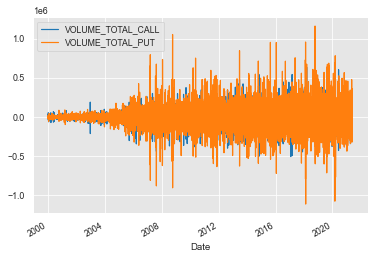

In [6]:
volumes = index_n_vol['SPX'][['Date','VOLUME_TOTAL_CALL', 'VOLUME_TOTAL_PUT']].set_index(['Date'])

(volumes-volumes.shift(1)).plot(legend=True)

In [7]:
euro_vol = index_n_vol['SX5E'][impvol_cols].dropna()

make_impvol_gif(euro_vol, step=25, name = 'euro')

 25%|██▍       | 39/158 [00:06<00:18,  6.37it/s]


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [36]:
big_base = index_n_vol['VIX'].merge(index_n_vol['VSTOXX'],on=["Date"], how='right')

big_base = big_base.merge(index_n_vol['SPX'],on=["Date"], how='right')
big_base = big_base.merge(index_n_vol['SX5E'],on=["Date"], how='right')
big_base.interpolate(method='time' ,axis='index', limit_area='inside', inplace=True)


In [46]:
big_base.to_excel('Volatility_data_treated.xlsx', na_rep='#N/A N/A')


